# **Principal Component Analysis**

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

## Importing Libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


## Importing a Dataset

In [39]:
df = pd.read_csv("/workspaces/Supervised-Machine-Learning/Datasets/Iris.csv")

In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

## Defining Target and Independent Variables

In [42]:
X = df.select_dtypes(include=['float64', 'int64'])
X = X.drop(columns=['Id'])

In [43]:
Y = df.select_dtypes(include=['object'])
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Applying Standard Scaler and Finding Covariance Matrix 

In [44]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [45]:
cov_mat = np.cov(X_scaled.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print("Eigenvalues:\n {} \n".format(eigen_values))
print("Eigenvectors:\n {} \n".format(eigen_vectors))
print("Covariance Matrix:\n {} \n".format(cov_mat))

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Covariance Matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]] 



## Getting Eigen Values in Descending Order

In [46]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print("Eigen Values in descending order:")
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
for eigen_value, eigen_vector in eigen_pairs:
    print(eigen_value)

Eigen Values in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


## Performing PCA

In [47]:
pca = PCA()
pca = pca.fit(X_scaled)

In [48]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

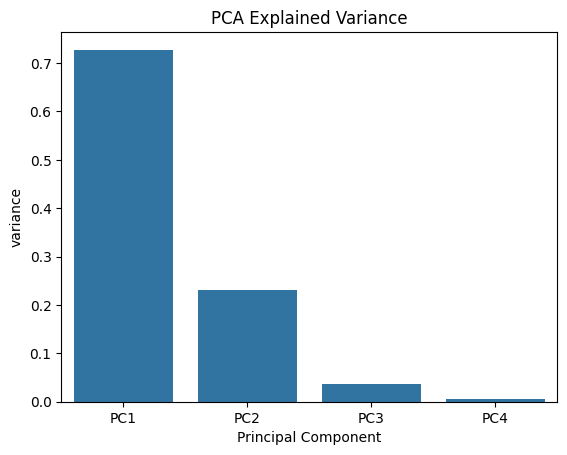

In [49]:
dataframe = pd.DataFrame({'variance': explained_variance,
                          'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4']})
sns.barplot(x='Principal Component', y='variance', data=dataframe)
plt.title('PCA Explained Variance')
plt.show()

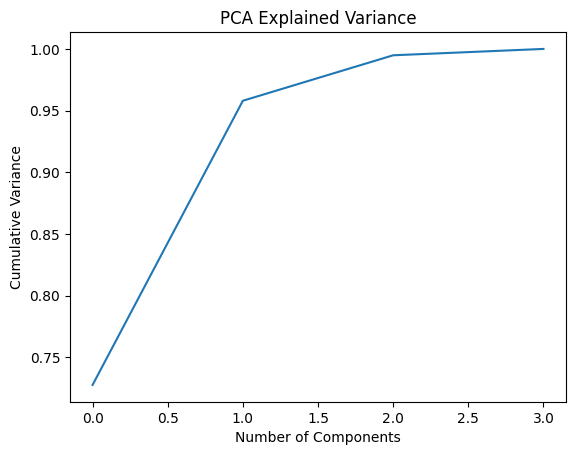

In [50]:
plt.plot(np.cumsum(explained_variance))
plt.title('PCA Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [51]:
pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit(X_scaled)
pca_2d = pca_2.transform(X)

/workspaces/Supervised-Machine-Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [52]:
df['Species'] = df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

/tmp/ipykernel_13167/1444994052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


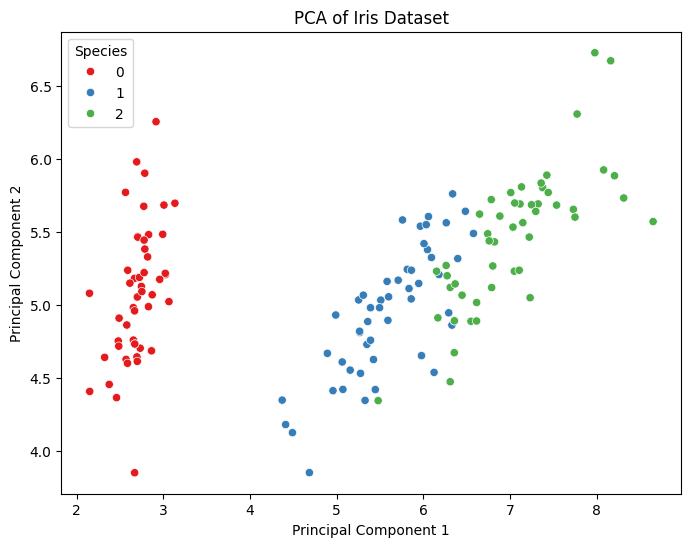

In [53]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=df['Species'], palette='Set1')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='best')
plt.show()

In [54]:
pca_4 = PCA(n_components=4)
pca_4 = pca_4.fit(X_scaled)
pca_4d = pca_4.transform(X)

/workspaces/Supervised-Machine-Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


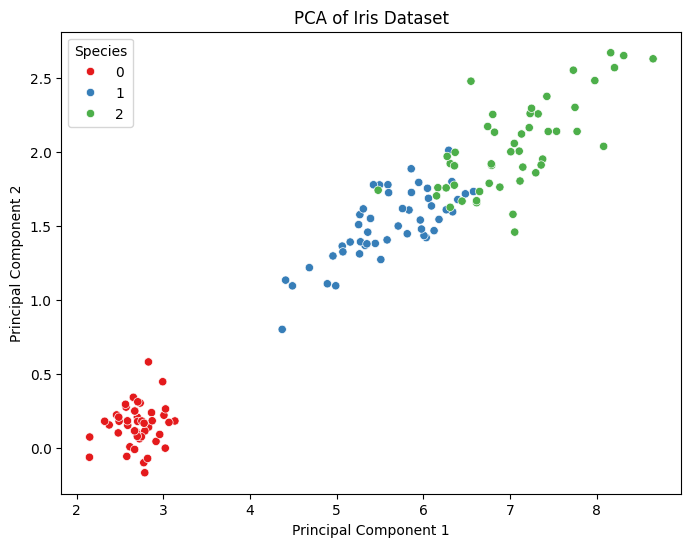

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_4d[:,0], y=pca_4d[:,3], hue=df['Species'], palette='Set1')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='best')
plt.show()